In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

In [44]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/output.csv"
meps_df = pd.read_csv(path, sep = ";")

In [45]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,...,born_month,born_year,disability,born_lat,born_lon,relatives,educated_at,highest_degree,occupation,born_region
0,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,DEU,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,...,4.0,1986.0,NaN,51.513.888.888,7.465.277.777,NaN,NaN,university,"manager,journalist,politician",native
1,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,ITA,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,...,10.0,1971.0,NaN,41.35,13.416.666.666,NaN,Sapienza University of Rome,university,"businessperson,lawyer,manager,politician",native
2,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,PRT,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,...,5.0,1959.0,NaN,39.361.952,-9.157.131,NaN,University of Évora,phd,"professor,politician,official",native
3,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,FRA,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,...,5.0,1987.0,NaN,50.631.944.444,30.575,NaN,Sciences Po,NaN,"lawyer,activist,politician",native
4,124812,fabio massimo castaldo,Castaldo,Fabio Massimo,IT,Renew,MALE,ITA,"AFET,SEDE,ECON,D-CL,DSCA,DLAT,DEPA",Rome,...,9.0,1985.0,NaN,41.893.055.555,12.482.777.777,NaN,Tor Vergata University of Rome,university,"lawyer,politician",native


In [4]:
group_list = list(set(meps_df["group"].tolist()))
country_list = list(set(meps_df["country"].tolist()))

In [5]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
org_list = list(set(org_list))
org_list.remove("nan")
org_list[:5]

['D-RU', 'DEVE', 'DACP', 'DMED', 'DEPA']

In [6]:
committee_list = [org for org in org_list if not "D-" in org]

In [7]:
occupation_list = []
for list_entry in meps_df["occupation"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            occupation_list.append(entry)
occupation_list = list(set(occupation_list))
occupation_list.remove("nan")
occupation_list[:5]

['official', 'horn player', 'interpreter', 'columnist', 'non-fiction writer']

In [8]:
degree_list = ["vocational", "secondary", "university", "phd"]

In [64]:
educated_at_list = []
for list_entry in meps_df["educated_at"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            educated_at_list.append(entry)
educated_at_list = list(set(educated_at_list))
#for entry in educated_at_list:
#    filter_educated_at_list = educated_at_list.copy()
#    filter_educated_at_list.remove(entry)
#    for second_entry in filter_educated_at_list:
#        if entry in second_entry and entry in educated_at_list:
#            educated_at_list.remove(entry)
#educated_at_list.remove("nan")
educated_at_list[:5]

['Saint Margaret High School',
 'Babeș-Bolyai University',
 'Autonomous University of Madrid',
 'Wayne State University',
 'TU Dresden']

## Gender

In [10]:
def filter_women_perc_df(column, column_entries, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[column_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "Percentage of women"})
    return filter_percentage_df.sort_values("Percentage of women")

In [11]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df

,gender,count,percentage
0,MALE,427,0.603107
1,FEMALE,281,0.396893


In [12]:
group_women_perc_df = filter_women_perc_df("group", group_list, meps_df)
group_women_perc_df.sort_values("Percentage of women")

,Percentage of women
ECR,27.536232
NI,31.372549
PPE,37.078652
ID,37.288136
Renew,42.156863
S&D,43.165468
Verts/ALE,48.611111
The Left,52.631579


In [13]:
country_women_perc_df = filter_women_perc_df("country", country_list, meps_df)
country_women_perc_df.sort_values("Percentage of women")[:10]
#country_women_perc_df = country_women_perc_df.reset_index().rename(columns = {"index": "country"})
#country_women_perc_df.to_csv("gender_country.csv", index = False)

,Percentage of women
RO,15.151515
CY,16.666667
GR,23.809524
SK,26.666667
LT,27.272727
EE,28.571429
BG,29.411765
MT,33.333333
HR,33.333333
CZ,33.333333


In [14]:
country_women_perc_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
LU,66.666667
FI,57.142857
SE,52.380952
ES,50.847458
LV,50.000000
FR,48.101266
PT,47.619048
IT,46.052632
NL,44.827586
DK,42.857143


In [15]:
committee_percentage_df = filter_women_perc_df("memberships", committee_list, meps_df)
committee_percentage_df.sort_values("Percentage of women")[:10]

,Percentage of women
DARP,20.000000
AFCO,21.428571
DCAS,23.529412
DPAC,25.925926
DNAT,26.315789
BUDG,27.272727
SEDE,28.070175
AFET,29.032258
DSEE,29.166667
DKOR,29.166667


In [16]:
committee_percentage_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
FEMM,85.294118
DSAS,65.217391
EMPL,56.310680
SANT,53.571429
DSCA,53.125000
DAND,50.000000
DPAL,48.484848
ENVI,47.953216
DEVE,46.938776
DCAB,46.153846


In [17]:
memberships_df = meps_df.loc[meps_df["memberships"].notna()]
memberships_df = memberships_df.loc[memberships_df["memberships"].str.contains("AFCO")]
memberships_df["gender"].value_counts()

MALE      44
FEMALE    12
Name: gender, dtype: int64

## Place of birth

Where were MEPs born?

In [46]:
meps_df["born_region"].value_counts()

native    642
other      52
eu         11
Name: born_region, dtype: int64

Which countries have MEPs born in other countries?

In [48]:
origins_by_country_df = meps_df.groupby("country")["born_region"].value_counts().unstack(fill_value=0)
origins_by_country_df = origins_by_country_df.reset_index()[["country", "native", "eu", "other"]]
origins_by_country_df["total"] = origins_by_country_df[["native", "eu", "other"]].sum(axis = 1)
origins_by_country_df["total"] = round(origins_by_country_df[["native", "eu", "other"]].sum(axis = 1), 2)
origins_by_country_df["native_pc"] = round(origins_by_country_df["native"] / origins_by_country_df["total"], 2)
origins_by_country_df["eu_pc"] = round(origins_by_country_df["eu"] / origins_by_country_df["total"], 2)
origins_by_country_df["other_pc"] = round(origins_by_country_df["other"] / origins_by_country_df["total"], 2)
origins_by_country_df = origins_by_country_df.sort_values(by = "native_pc", ascending = False)
origins_by_country_df[:10]

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
26,SK,14,0,0,14,1.00,0.00,0.00
4,CZ,21,0,0,21,1.00,0.00,0.00
6,DK,14,0,0,14,1.00,0.00,0.00
7,EE,7,0,0,7,1.00,0.00,0.00
19,MT,6,0,0,6,1.00,0.00,0.00
25,SI,8,0,0,8,1.00,0.00,0.00
15,IT,75,0,1,76,0.99,0.00,0.01
23,RO,32,0,1,33,0.97,0.00,0.03
21,PL,50,1,1,52,0.96,0.02,0.02
5,DE,92,0,4,96,0.96,0.00,0.04


In [49]:
non_native_df = origins_by_country_df[["country", "eu_pc", "other_pc"]]
non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100
non_native_df = non_native_df.drop(["eu_pc", "other_pc"], axis = 1)
non_native_df = non_native_df.sort_values("non_native_pc", ascending = False)
non_native_df.to_csv("non_native.csv", index = False, sep =";")
non_native_df[:10]

C:\Users\lorga\AppData\Local\Temp\ipykernel_23184\3790901719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100


born_region,country,non_native_pc
16,LT,36.0
13,HU,33.0
24,SE,29.0
0,AT,21.0
3,CY,17.0
17,LU,17.0
12,HR,16.0
10,FR,14.0
8,ES,12.0
2,BG,12.0


Wurden diese Abgeordneten in der EU oder außerhalb geboren?

In [50]:
origins_by_country_df.sort_values("eu_pc", ascending = False).head()

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
17,LU,5,1,0,6,0.83,0.17,0.00
13,HU,14,3,4,21,0.67,0.14,0.19
12,HR,10,1,1,12,0.83,0.08,0.08
0,AT,15,1,3,19,0.79,0.05,0.16
10,FR,68,3,8,79,0.86,0.04,0.10


In [51]:
origins_by_country_df.sort_values("other_pc", ascending = False).head()

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
16,LT,7,0,4,11,0.64,0.00,0.36
24,SE,15,0,6,21,0.71,0.00,0.29
13,HU,14,3,4,21,0.67,0.14,0.19
3,CY,5,0,1,6,0.83,0.00,0.17
0,AT,15,1,3,19,0.79,0.05,0.16


Which German MEPs were not born in Germany?

In [52]:
meps_df.loc[(meps_df["country"] == "DE") & (meps_df["born_region"] != "native")]

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,...,born_month,born_year,disability,born_lat,born_lon,relatives,educated_at,highest_degree,occupation,born_region
221,197459,pierrette herzberger-fofana,Herzberger-Fofana,Pierrette,DE,Verts/ALE,FEMALE,DEU,"DEVE,DPAP,DACP,DAFR,DCAR,AFET,FEMM",Bamako,...,3.0,1949.0,NaN,12.645.833.333,-7.992.222.222,NaN,"Trier University,University of Erlangen–Nuremberg",NaN,politician,other
508,251268,michael kauch,Kauch,Michael,DE,Renew,MALE,DEU,"ITRE,D-IL,AFET,ECON,DACP,DAFR",NaN,...,5.0,1967.0,NaN,NaN,NaN,NaN,NaN,university,"manager,marketeer,consultant,politician",other
558,197460,sergey lagodinsky,Lagodinsky,Sergey,DE,Verts/ALE,MALE,DEU,"D-TR,JURI,DEPA,AFET,LIBE,DSCA,D-US",Astrakhan,...,12.0,1975.0,NaN,46.35,48.035,NaN,John F. Kennedy School of Government,phd,"lawyer,politician",other
560,197468,özlem demirel,Demirel,Özlem,DE,The Left,FEMALE,DEU,"SEDE,D-TR,EMPL,AFET",Malatya,...,3.0,1984.0,NaN,3.835.062,383.094,NaN,University of Bonn,NaN,politician,other


## Education

For how many MEPs do we have degree data?

In [26]:
len(meps_df.loc[meps_df["highest_degree"].notna()].index)

328

What are the highest degrees that MEPs have achieved?

In [27]:
degree_count_df = pd.DataFrame(meps_df.value_counts("highest_degree"))
degree_count_df = degree_count_df.reindex(degree_list)
degree_count_df = degree_count_df.reset_index().rename(columns = {0: "count"})
degree_count_df.to_csv("degree_count_df.csv", index = False, sep =";")
degree_count_df

,highest_degree,count
0,vocational,1
1,secondary,7
2,university,214
3,phd,106


Does degree composition change along group lines?

In [28]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    degree_dict = {}
    for degree in degree_list:
        degree_dict[degree] = 0
    notna_df = group_df.loc[group_df["highest_degree"].notna()]["highest_degree"]
    for entry in notna_df.tolist():
        for degree in degree_list:
            if degree in entry:
                degree_dict[degree] += 1
    overall_dict[group] = degree_dict
group_degree_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_degree_df["total"] = group_degree_df.sum(axis = 1)
for column in group_degree_df.columns:
    group_degree_df[column] = round(group_degree_df[column] / group_degree_df["total"] * 100, 2)
group_degree_df = group_degree_df.drop(columns = "total")
group_degree_df

,vocational,secondary,university,phd
The Left,0.00,0.00,70.00,30.00
ID,0.00,11.11,61.11,27.78
S&D,0.00,0.00,59.46,40.54
Verts/ALE,0.00,6.06,72.73,21.21
Renew,1.89,0.00,79.25,18.87
ECR,0.00,4.35,56.52,39.13
NI,0.00,0.00,55.56,44.44
PPE,0.00,2.22,64.44,33.33


Which MEPs have only a vocational degree?

In [29]:
meps_df.loc[meps_df["highest_degree"] == "vocational"]

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,highest_degree,occupation,born_region
310,197504,jérémy decerle,Decerle,Jérémy,FR,Renew,MALE,FRA,"AGRI,D-BR,INTA,DPAP",Saint-Remy,1.0,7.0,1984.0,NaN,Daniel Decerle,NaN,vocational,"politician,farmer,trade unionist",other


Where were MEPs educated?

In [85]:
notna_df = meps_df.loc[meps_df["educated_at"].notna()]["educated_at"]
educated_at_df = notna_df.value_counts("educated_at")
educated_at_dict = {}
for entry in notna_df.tolist():
    for university in entry.split(","):
        if university not in educated_at_dict.keys():
            educated_at_dict[university] = 1
        else:
            educated_at_dict[university] += 1
educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
educated_at_df = educated_at_df.rename(columns = {0: "count"})
educated_at_df = educated_at_df.drop(index = "Faculty of Law and Administration")
educated_at_df = educated_at_df.sort_values("count", ascending = False)
educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university"})
educated_at_df = educated_at_df[:10]
educated_at_df.to_csv("educated_at.csv", index = False, sep =";")
educated_at_df

,university,count
0,Sciences Po,14
1,Eötvös Loránd University,11
2,University of Vienna,8
3,Sapienza University of Rome,7
4,National and Kapodistrian University of Athens,7
5,Complutense University of Madrid,7
6,University of Tartu,7
7,University of Latvia,7
8,University of Bologna,7
9,Free University Berlin,6


In which countries are MEPs likely to have gone to the same universities?

In [86]:
def get_top_uni_pc(column, entry):
    filter_df = meps_df.loc[meps_df[column] == entry]
    educated_at_dict = {}
    for educated_at in educated_at_list:
        educated_at_dict[educated_at] = 0
    notna_df = filter_df.loc[meps_df["educated_at"].notna()]["educated_at"]
    for entry in notna_df.tolist():
        for educated_at in educated_at_list:
            if educated_at in entry:
                educated_at_dict[educated_at] += 1
    educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
    educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university", 0: "count"})
    educated_at_df = educated_at_df.sort_values(by = "count", ascending = False)
    mep_count = len(notna_df.index)
    total_mep_count = len(filter_df.index)
    top_uni = educated_at_df["university"].values[0]
    top_uni_count = educated_at_df["count"].values[0]
    top_uni_pc = round(top_uni_count / mep_count * 100, 2)
    return top_uni, top_uni_pc, top_uni_count, mep_count, total_mep_count

In [87]:
country_uni_dict = {}
for country in country_list:
    country_uni_dict[country] = get_top_uni_pc("country", country)
country_uni_df = pd.DataFrame.from_dict(country_uni_dict, orient = "index")
country_uni_df = country_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
country_uni_df = country_uni_df.sort_values("percentage", ascending = False)
country_uni_df

,university,percentage,meps,meps_with_data,total_meps
CY,National and Kapodistrian University of Athens,100.00,2,2,6
EE,University of Tartu,100.00,7,7,7
LV,University of Latvia,87.50,7,8,8
SI,University of Ljubljana,71.43,5,7,8
HR,University of Zagreb,70.00,7,10,12
LT,Vilnius University,66.67,6,9,11
MT,University of Malta,60.00,3,5,6
HU,Eötvös Loránd University,55.00,11,20,21
SE,Stockholm University,50.00,3,6,21
FI,University of Helsinki,50.00,5,10,14


What about groups?

In [88]:
group_uni_dict = {}
for group in group_list:
    group_uni_dict[group] = get_top_uni_pc("group", group)
group_uni_df = pd.DataFrame.from_dict(group_uni_dict, orient = "index")
group_uni_df = group_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
group_uni_df = group_uni_df.sort_values("percentage", ascending = False)
group_uni_df

,university,percentage,meps,meps_with_data,total_meps
NI,Eötvös Loránd University,17.14,6,35,51
The Left,National and Kapodistrian University of Athens,13.64,3,22,38
Verts/ALE,Free University Berlin,8.70,4,46,72
ECR,University of Warsaw,8.51,4,47,69
ID,Sapienza University of Rome,6.67,2,30,59
Renew,Sciences Po,5.63,4,71,102
S&D,University of Bologna,4.30,4,93,139
PPE,Vienna,3.48,4,115,178


## Occupations

How about occupation data?

In [62]:
len(meps_df.loc[meps_df["occupation"].notna()].index)

667

What are the most common occupations?

In [154]:
occupation_dict = {}
for occupation in occupation_list:
    occupation_dict[occupation] = 0
notna_df = meps_df.loc[meps_df["occupation"].notna()]["occupation"]
for entry in notna_df.tolist():
    for occupation in occupation_list:
        if occupation in entry:
            occupation_dict[occupation] += 1
occupation_count_df = pd.DataFrame.from_dict(occupation_dict, orient = "index")
occupation_count_df = occupation_count_df.rename(columns = {0: "count"})
occupation_count_df = occupation_count_df.sort_values("count", ascending = False)
occupation_count_df["percentage"] = round(occupation_count_df["count"] / len(notna_df.index), 3) * 100
occupation_count_df = occupation_count_df.drop(columns = "count", index = "politician")
occupation_count_df = occupation_count_df.reset_index().rename(columns = {"index": "occupation"})
occupation_count_df = occupation_count_df[:10]
occupation_count_df.to_csv("occupation_count.csv", index = False, sep =";")
occupation_count_df

,occupation,percentage
0,manager,23.5
1,lawyer,19.3
2,researcher,15.4
3,official,14.4
4,professor,12.0
5,journalist,10.3
6,teacher,7.0
7,consultant,4.6
8,diplomat,3.9
9,engineer,3.7


Does occupation composition change along group lines?

In [68]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    occupation_dict = {}
    for occupation in occupation_list:
        occupation_dict[occupation] = 0
    notna_df = group_df.loc[group_df["occupation"].notna()]["occupation"]
    for entry in notna_df.tolist():
        for occupation in occupation_list:
            if occupation in entry:
                occupation_dict[occupation] += 1
    overall_dict[group] = occupation_dict
group_occupation_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_occupation_df["total"] = group_occupation_df.sum(axis = 1)
for column in group_occupation_df.columns:
    group_occupation_df[column] = round(group_occupation_df[column] / group_occupation_df["total"] * 100, 2)
group_occupation_df = group_occupation_df.drop(columns = "total")
group_occupation_df

,astronomer,musician,jazz musician,trade unionist,researcher,manager,professor,military personnel,slavist,television personality,...,collector,athlete,interpreter,photographer,banker,film director,horn player,teacher,propagandist,bookseller
S&D,0.00,0.00,0.00,1.15,8.62,10.06,8.62,0.00,0.00,0.00,...,0.00,0.29,0.0,0.29,0.29,0.00,0.0,3.74,0.00,0.00
Renew,0.00,0.00,0.00,0.40,6.85,13.71,2.82,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.40,0.00,0.4,1.61,0.00,0.00
NI,0.00,0.00,0.00,0.00,4.58,9.15,4.58,0.65,0.00,0.65,...,0.00,0.65,0.0,0.00,0.00,0.65,0.0,3.92,0.00,0.00
PPE,0.26,0.26,0.00,0.51,5.61,10.97,5.36,0.26,0.26,0.00,...,0.26,1.02,0.0,0.00,0.00,0.00,0.0,3.57,0.00,0.00
Verts/ALE,0.00,0.67,0.67,0.00,5.37,8.05,4.03,0.00,0.00,0.00,...,0.00,0.67,0.0,0.67,0.00,0.00,0.0,2.68,0.00,0.67
The Left,0.00,0.00,0.00,2.67,6.67,6.67,2.67,0.00,0.00,0.00,...,0.00,4.00,0.0,0.00,0.00,0.00,0.0,1.33,2.67,0.00
ID,0.00,0.00,0.00,0.90,2.70,4.50,2.70,0.90,0.00,0.00,...,0.00,0.00,0.9,0.00,0.00,0.00,0.0,0.90,0.00,0.00
ECR,0.00,0.00,0.00,0.81,8.87,7.26,3.23,0.00,0.00,0.00,...,0.00,0.81,0.0,0.00,0.00,0.81,0.0,3.23,0.00,0.00


Is there a "lawyers' party"?

In [69]:
group_occupation_df["lawyer"].sort_values(ascending = False)

ID           14.41
NI           12.42
PPE           9.44
S&D           8.33
Renew         7.26
Verts/ALE     4.03
ECR           2.42
The Left      1.33
Name: lawyer, dtype: float64

Is there a "farmers' party"?

In [70]:
group_occupation_df["farmer"].sort_values(ascending = False)

Renew        2.42
Verts/ALE    1.34
PPE          1.02
NI           0.65
S&D          0.57
The Left     0.00
ID           0.00
ECR          0.00
Name: farmer, dtype: float64

## Age

When were MEPs born?

In [28]:
meps_birthyear_df = pd.DataFrame(meps_df["born_year"].value_counts())
meps_birthyear_df = meps_birthyear_df.reset_index().rename(columns = {"index": "year", "born_year": "count"})
meps_birthyear_df = meps_birthyear_df.sort_values(by = "year")
meps_birthyear_df = meps_birthyear_df.loc[meps_birthyear_df["year"] > 1900]
meps_birthyear_df.head()

,year,count
50,1940.0,1
46,1944.0,3
49,1945.0,2
47,1946.0,2
45,1947.0,3


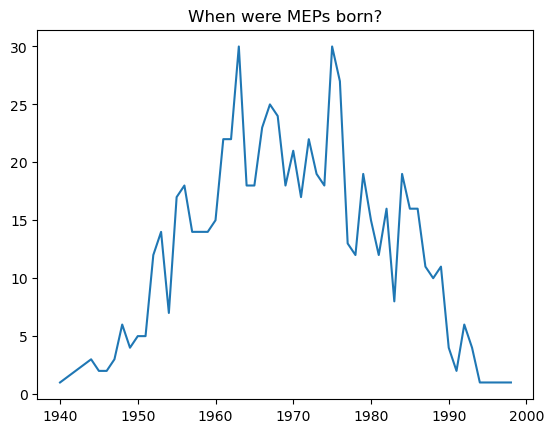

In [29]:
plt.plot(meps_birthyear_df["year"], meps_birthyear_df['count'])
plt.title("When were MEPs born?")
plt.show()

What's the Parliament's median age?

In [30]:
not_na_df = meps_df.loc[meps_df["born_year"].notna()]
birth_dates = not_na_df["born_year"].tolist()
ages = [(2024 - birth_date) for birth_date in birth_dates]
ages = sorted(ages)
median_age = ages[round(len(ages) / 2)]
median_age = round(median_age, 1)
median_age

55.0

How do committees vary in median age?

In [31]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    df = df.loc[meps_df["born_year"].notna()]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        birth_dates = filter_df["born_year"].tolist()
        ages = [(2024 - birth_date) for birth_date in birth_dates]
        ages = sorted(ages)
        median_age = ages[round(len(ages) / 2)]
        median_age = round(median_age)
        median_age_dict[filter_entry] = median_age
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    median_age_df = median_age_df.sort_values("median_age")
    return median_age_df

In [35]:
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df[:10]

,committee,median_age
10,LIBE,51
2,SANT,51
14,DPAL,51
39,IMCO,51
34,PETI,51
30,DCAR,52
27,ITRE,53
20,DEEA,53
22,FEMM,53
45,ENVI,53


In [33]:
committee_median_age_df.sort_values("median_age", ascending = False)[:10]

,committee,median_age
17,DNAT,62
33,DPAC,62
11,DEVE,60
21,DPAP,60
18,DCAS,59
44,DSCA,59
12,AFCO,59
42,DACP,58
5,INTA,57
9,DEPA,57


In [34]:
group_median_age_df = get_median_age("group", group_list, meps_df)
group_median_age_df = group_median_age_df.rename(columns = {"org": "group"})
group_median_age_df.sort_values("median_age")

,group,median_age
4,Verts/ALE,49
5,The Left,51
1,Renew,52
2,NI,54
3,PPE,55
0,S&D,56
6,ID,57
7,ECR,59


Does median age differ from country to country?

In [56]:
country_median_age_df = get_median_age("country", country_list, meps_df)
country_median_age_df = country_median_age_df.rename(columns = {"org": "country"})
country_median_age_df.head()

,country,median_age
21,MT,45
26,HU,49
1,NL,49
17,CZ,49
15,PT,51


How does that compare to countries' median ages?

In [57]:
ages_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/ages.csv")
ages_df = ages_df.rename(columns = {" years": "country_median"})
ages_df = ages_df[["slug", "country_median"]]
ages_df.head()

,slug,country_median
0,monaco,56.2
1,italy,48.1
2,andorra,48.1
3,germany,46.7
4,spain,46.3


In [58]:
median_age_difference_df = country_median_age_df
def get_country_code(slug):
    code_dict = {
        "MT": "malta",
        "NL": "netherlands",
        "CZ": "czechia",
        "HU": "hungary",
        "PT": "portugal",
        "SE": "sweden",
        "BG": "bulgaria",
        "HR": "croatia",
        "DE": "germany",
        "ES": "spain",
        "RO": "romania",
        "AT": "austria",
        "BE": "belgium",
        "IT": "italy",
        "SK": "slovakia",
        "FR": "france",
        "DK": "denmark",
        "IE": "ireland",
        "EE": "estonia",
        "GR": "greece",
        "SI": "slovenia",
        "CY": "cyprus",
        "LU": "luxembourg",
        "PL": "poland",
        "FI": "finland",
        "LV": "latvia",
        "LT": "lithuania"
    }
    return code_dict[slug]
median_age_difference_df["slug"] = median_age_difference_df["country"].apply(get_country_code)
median_age_difference_df = median_age_difference_df.rename(columns = {"median_age": "mep_median"})
median_age_difference_df = median_age_difference_df.merge(ages_df, on = "slug", how = "left")
median_age_difference_df["difference"] = median_age_difference_df["mep_median"] - median_age_difference_df["country_median"]
median_age_difference_df = median_age_difference_df.sort_values(by = "difference", ascending = False)
median_age_difference_df

,country,mep_median,slug,country_median,difference
23,CY,61,cyprus,39.1,21.9
21,LU,61,luxembourg,39.8,21.2
25,LT,66,lithuania,45.0,21.0
26,LV,66,latvia,45.2,20.8
24,FI,64,finland,43.2,20.8
22,PL,61,poland,42.4,18.6
17,IE,57,ireland,39.8,17.2
14,DK,56,denmark,42.2,13.8
16,FR,56,france,42.4,13.6
15,SK,56,slovakia,42.5,13.5
